In [1]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
import pandas as pd
import datetime
import numpy as np

In [3]:
%matplotlib inline

In [4]:
#Alert %
profit = 2
loss = -2

In [5]:
ref_dates=pd.read_csv('ref_dates.csv')

In [6]:
ref_dates['ref_date']=pd.to_datetime(ref_dates.ref_date)

In [7]:
ref_dates.dtypes

ref_date    datetime64[ns]
stock               object
dtype: object

In [8]:
ref_dates

,ref_date,stock
0,2017-12-01,AMZN
1,2017-12-01,GOOG
2,2018-01-04,NVDA
3,2017-12-20,FUSEX
4,2018-01-04,NFLX
5,2017-12-01,AMAT
6,2018-01-05,FNCMX


In [12]:
stocks_to_track=list(ref_dates.stock.values)

In [10]:
stocks_to_track=['FNCMX']

In [13]:
df_list=[]

In [14]:
for x in stocks_to_track:
    #print(x)
    url="https://www.alphavantage.co/query?apikey=6PFVKSN75XGEMU6S&function=TIME_SERIES_DAILY_ADJUSTED&symbol="+x+"&datatype=csv"
    #print(url)
    d1=pd.read_csv(url)
    d1['stock']=x
    df_list.append(d1)

In [15]:
df = pd.concat(df_list)

In [16]:
df.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,stock
0,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3458929,0.0,1.0,AMZN
1,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3000366,0.0,1.0,AMZN
2,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3044664,0.0,1.0,AMZN
3,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2587899,0.0,1.0,AMZN
4,2017-12-29,1182.35,1184.00,1167.50,1169.47,1169.47,2625283,0.0,1.0,AMZN


In [17]:
df['timestamp']=pd.to_datetime(df.timestamp)

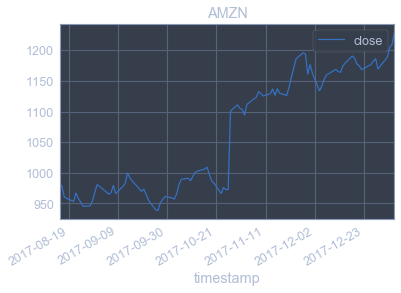

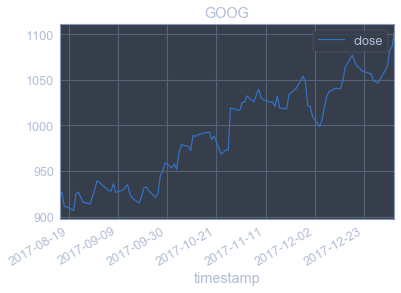

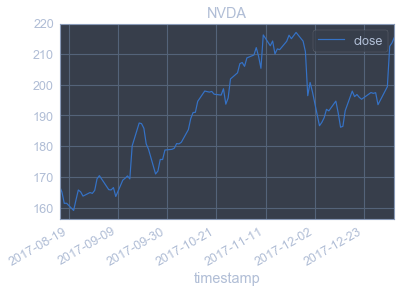

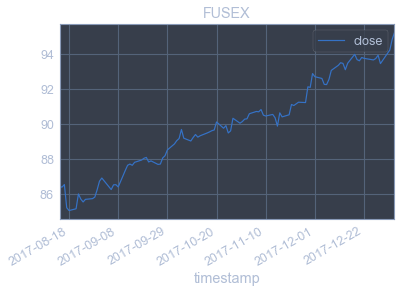

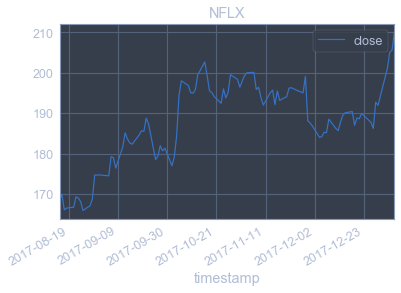

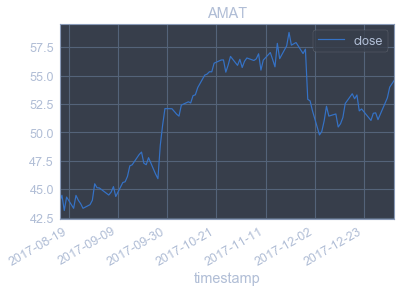

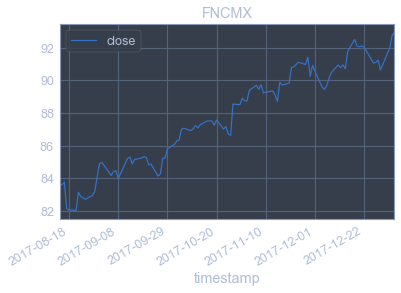

In [18]:
for x in stocks_to_track:
    df[df.stock==x].plot(x='timestamp',y='close',title=x)

In [19]:
df2=df.merge(ref_dates,on='stock')

In [20]:
df2.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,stock,ref_date
0,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3458929,0.0,1.0,AMZN,2017-12-01
1,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3000366,0.0,1.0,AMZN,2017-12-01
2,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3044664,0.0,1.0,AMZN,2017-12-01
3,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2587899,0.0,1.0,AMZN,2017-12-01
4,2017-12-29,1182.35,1184.00,1167.50,1169.47,1169.47,2625283,0.0,1.0,AMZN,2017-12-01


In [21]:
df2.shape,df.shape

((700, 11), (700, 10))

In [22]:
df2.dtypes

timestamp            datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
adjusted_close              float64
volume                        int64
dividend_amount             float64
split_coefficient           float64
stock                        object
ref_date             datetime64[ns]
dtype: object

In [23]:
df2['date']=df2.timestamp.dt.date

In [24]:
df2['date']=pd.to_datetime(df2.date)

In [25]:
df2.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,stock,ref_date,date
0,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3458929,0.0,1.0,AMZN,2017-12-01,2018-01-05
1,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3000366,0.0,1.0,AMZN,2017-12-01,2018-01-04
2,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3044664,0.0,1.0,AMZN,2017-12-01,2018-01-03
3,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2587899,0.0,1.0,AMZN,2017-12-01,2018-01-02
4,2017-12-29,1182.35,1184.00,1167.50,1169.47,1169.47,2625283,0.0,1.0,AMZN,2017-12-01,2017-12-29


In [26]:
ref=df2.loc[df2.date==df2.ref_date,['stock','close']]

In [27]:
df2.ref_date.unique()

array(['2017-12-01T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2017-12-20T00:00:00.000000000', '2018-01-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [26]:
df2[df2.stock=='FUSEX'].date.max()

Timestamp('2018-01-02 00:00:00')

In [28]:
max_date=df2.groupby('stock',as_index=False).agg({'date':'max'})

In [29]:
max_date.rename(columns={'date':'max_date'},inplace=True)

In [30]:
max_date.dtypes

stock               object
max_date    datetime64[ns]
dtype: object

In [31]:
df3=df2.merge(max_date,on='stock')

In [32]:
now=df3.loc[df3.date==df3.max_date,['stock','close']]

In [33]:
now.rename(columns={'close':'current_price'},inplace=True)

In [34]:
ref.rename(columns={'close':'reference_price'},inplace=True)

In [35]:
data=ref.merge(now,on='stock')

In [36]:
data['perc_diff']=(data.current_price/data.reference_price -1)*100

In [37]:
data['profit_flag'] = np.where(data.perc_diff >= profit,1,0)

In [38]:
data['loss_flag'] = np.where(data.perc_diff <= loss,1,0)

In [39]:
data

,stock,reference_price,current_price,perc_diff,profit_flag,loss_flag
0,AMZN,1162.35,1229.14,5.746118,1,0
1,GOOG,1010.17,1102.23,9.113318,1,0
2,NVDA,213.59,215.40,0.847418,0,0
3,FUSEX,93.60,95.22,1.730769,0,0
4,NFLX,205.63,209.99,2.120313,1,0
5,AMAT,51.91,54.60,5.182046,1,0


In [39]:
data.profit_flag.sum()

6

In [40]:
data.loss_flag.sum()

0

In [41]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [42]:
import smtplib

from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# me == my email address
# you == recipient's email address
me = "kirtiraj.careers@gmail.com"
you = "kr.mohanty@gmail.com"

# Create message container - the correct MIME type is multipart/alternative.
msg = MIMEMultipart('alternative')
msg['Subject'] = "Stock Alert"
msg['From'] = me
msg['To'] = you

# Create the body of the message (a plain-text and an HTML version).
#text = "Hi!\nHow are you?\nHere is the link you wanted:\nhttp://www.python.org"
html = data.to_html()

# Record the MIME types of both parts - text/plain and text/html.
#part1 = MIMEText(text, 'plain')
part2 = MIMEText(html, 'html')

# Attach parts into message container.
# According to RFC 2046, the last part of a multipart message, in this case
# the HTML message, is best and preferred.
#msg.attach(part1)
msg.attach(part2)


In [46]:
if (data.profit_flag.sum() > 0 or data.loss_flag.sum() >0):
    # Send the message via local SMTP server.
    mail = smtplib.SMTP('smtp.gmail.com', 587)

    mail.ehlo()

    mail.starttls()

    mail.login('kirtiraj.careers', pwd)
    mail.sendmail(me, you, msg.as_string())
    mail.quit()
    print('email sent')

email sent
